# 利用PCA来简化数据
**降维（dimensionality reduction）**

在低维下，数据更容易处理。我们在应用机器学习算法之前，必须先识别出其相关的特征。
## 降维技术
* **PCA（Principal Component Analysis）主成分分析**

将原坐标系转换，第一个坐标轴选择方差最大的方向，第二个坐标系选择与第一个坐标系正交（orthogonal）且方差最大的方向，以此类推。

* **FA（Factor Analysis）因子分析**

假设数据是隐变量（latent variable）和某些噪声的线性组合。

* **ICA（Independent Component Analysis）独立成分分析**

假设数据是有N个数据源生成的，这些数据源之间相互独立。

## 在Numpy中实现PCA
伪代码：

        去除平均值
        计算协方差矩阵
        计算协方差矩阵的特征值和特征向量
        将特征值从大到小排序
        保留最上面的N个特征向量
        将数据转换到上述N个特征向量构建的新空间中

In [29]:
from numpy import *
def load_dataset(filename, delim='\t'):
    fr = open(filename)
    str_arr = [line.strip().split(delim) for line in fr.readlines()]
    data_arr = [list(map(float, line)) for line in str_arr]
    return mat(data_arr)

In [30]:
datamat = load_dataset('testSet.txt')

In [31]:
datamat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [32]:
def pca(datamat, topNfeat=9999999):
    mean_val = mean(datamat, axis=0)
    mean_removed = datamat - mean_val
    covmat = cov(mean_removed, rowvar=0)
    print('covmat:\n',covmat)
    # covmat = (mean_removed.T * mean_removed) / len(mean_removed[:, 0])
    eig_vals, eig_vec = linalg.eig(covmat)
    print('eig_vals:\n',eig_vals)
    eig_vals_index = argsort(eig_vals)
    eig_vals_index = eig_vals_index[:-(topNfeat+1):-1]
    print('eig_vals_index:\n',eig_vals_index)
    reg_eig_vec = eig_vec[:, eig_vals_index]
    print('reg_eig_vec:\n',reg_eig_vec)
    low_datamat = mean_removed * reg_eig_vec
    reconmat = (low_datamat * reg_eig_vec.T) + mean_val
    return low_datamat, reconmat

In [33]:
lowmat, reconmat = pca(datamat, 1)

covmat:
 [[1.05198368 1.1246314 ]
 [1.1246314  2.21166499]]
eig_vals:
 [0.36651371 2.89713496]
eig_vals_index:
 [1]
reg_eig_vec:
 [[-0.52045195]
 [-0.85389096]]


In [34]:
shape(lowmat)

(1000, 1)

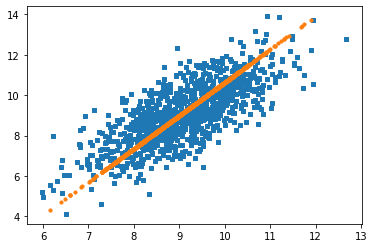

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
# print('datamat[:, 1].T.A:\n',datamat[:, 1].T.A)
ax.scatter(datamat[:, 0].T.A[0], datamat[:, 1].T.A[0], marker='s', s=10)
ax.scatter(reconmat[:, 0].T.A[0], reconmat[:, 1].T.A[0], marker='o', s=10)

In [38]:
lowmat, reconmat = pca(datamat, 2)

covmat:
 [[1.05198368 1.1246314 ]
 [1.1246314  2.21166499]]
eig_vals:
 [0.36651371 2.89713496]
eig_vals_index:
 [1 0]
reg_eig_vec:
 [[-0.52045195 -0.85389096]
 [-0.85389096  0.52045195]]


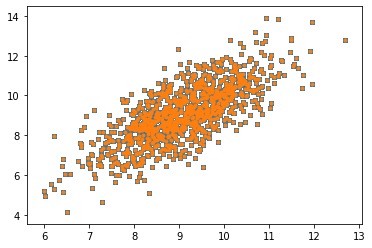

In [39]:
fig.clf()
ax = plt.subplot(111)
ax.scatter(datamat[:, 0].T.A[0], datamat[:, 1].T.A[0], marker='s', s=10)
ax.scatter(reconmat[:, 0].T.A[0], reconmat[:, 1].T.A[0], marker='o', s=10)

## 示例：利用PCA对半导体制造数据降维


### 处理数据中的缺失值
* 使用可用特征的均值填补
* 使用特殊值来填补，如0，-1
* 忽略有缺失值的样本
* 使用相似样本的均值填补
* 使用另外的机器学习预测缺失值

在这里，我们用平均值代替。

In [40]:
def replace_NaN_with_mean():
    datamat = load_dataset('secom.data', ' ')
    numfeat = shape(datamat)[1]
    for i in range(numfeat):
#         print('~isnan(datamat[:, i]).A:\n', ~isnan(datamat[:, i]))
        mean_val = mean(datamat[nonzero(~isnan(datamat[:, i]).A)[0], i])
        datamat[nonzero(isnan(datamat[:, i]).A)[0], i] = mean_val
    return datamat

In [41]:
datamat = replace_NaN_with_mean()

In [42]:
mean_val = mean(datamat, axis=0)
mean_removed = datamat - mean_val
covmat = cov(mean_removed, rowvar=0)
eig_val, eig_vec = linalg.eig(covmat)
eig_val

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

Text(0, 0.5, 'Percentage of Variance')

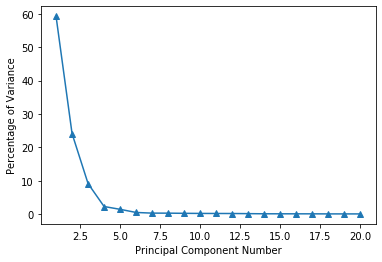

In [48]:
eig_val_index = argsort(eig_val)
eig_val_index = eig_val_index[::-1]#reverse
sorted_eig_vals = eig_val[eig_val_index]
total = sum(sorted_eig_vals)
varPercentage = sorted_eig_vals / total * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
